In [ ]:
%pip install tqdm

In [3]:
import warnings
import os

from NeuralNetwork.CNN import CNN_MEL, CNN_CHR, CNN_MFCC
from NeuralNetwork.CRNN import CRNN_MEL, CRNN_CHR, CRNN_MFCC

warnings.filterwarnings("ignore")
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # keep this, use the second GPU, i'll use the first one

In [4]:
try:
    del model_mel
    del model_chr
    del model_mfcc
    print("clean!")
except:
    pass
model_mel = CRNN_MEL((1293,128,1))
model_chr = CNN_CHR((1293,12,1))
model_mfcc = CRNN_MFCC((1293, 20, 1))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1293, 128, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 646, 64, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 646, 64, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 323, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 323, 32, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 161, 16, 128)     

Found 999 images belonging to 10 classes.
Epoch 1/230


2024-01-28 21:32:45.201070: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-01-28 21:32:45.745240: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6612110100 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-28 21:32:45.745259: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4090, Compute Capability 8.9
2024-01-28 21:32:45.748231: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1706448765.789894 4011518 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


50/50 - 3s - loss: 2.5725 - acc: 0.1171 - 3s/epoch - 62ms/step
Epoch 2/230
50/50 - 0s - loss: 2.5031 - acc: 0.0951 - 420ms/epoch - 8ms/step
Epoch 3/230
50/50 - 0s - loss: 2.5155 - acc: 0.0881 - 414ms/epoch - 8ms/step
Epoch 4/230
50/50 - 0s - loss: 2.4463 - acc: 0.1101 - 415ms/epoch - 8ms/step
Epoch 5/230
50/50 - 0s - loss: 2.4289 - acc: 0.0931 - 417ms/epoch - 8ms/step
Epoch 6/230
50/50 - 0s - loss: 2.4183 - acc: 0.0891 - 409ms/epoch - 8ms/step
Epoch 7/230
50/50 - 0s - loss: 2.3786 - acc: 0.1021 - 415ms/epoch - 8ms/step
Epoch 8/230
50/50 - 0s - loss: 2.4028 - acc: 0.0871 - 416ms/epoch - 8ms/step
Epoch 9/230
50/50 - 0s - loss: 2.3511 - acc: 0.0951 - 450ms/epoch - 9ms/step
Epoch 10/230
50/50 - 0s - loss: 2.3379 - acc: 0.0841 - 413ms/epoch - 8ms/step
Epoch 11/230
50/50 - 0s - loss: 2.3316 - acc: 0.0951 - 420ms/epoch - 8ms/step
Epoch 12/230
50/50 - 0s - loss: 2.3314 - acc: 0.0871 - 418ms/epoch - 8ms/step
Epoch 13/230
50/50 - 0s - loss: 2.3216 - acc: 0.0881 - 422ms/epoch - 8ms/step
Epoch 14/

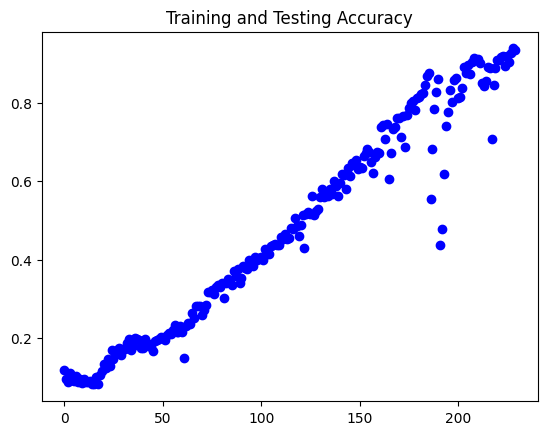

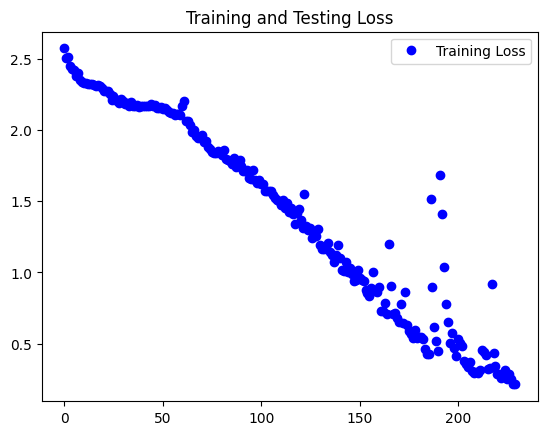

Found 999 images belonging to 10 classes.
Epoch 1/50
50/50 - 5s - loss: 2.4576 - acc: 0.1361 - 5s/epoch - 106ms/step
Epoch 2/50
50/50 - 1s - loss: 2.1826 - acc: 0.2072 - 1s/epoch - 28ms/step
Epoch 3/50
50/50 - 1s - loss: 2.0792 - acc: 0.2412 - 1s/epoch - 28ms/step
Epoch 4/50
50/50 - 1s - loss: 1.8875 - acc: 0.3023 - 1s/epoch - 28ms/step
Epoch 5/50
50/50 - 1s - loss: 1.8194 - acc: 0.3433 - 1s/epoch - 28ms/step
Epoch 6/50
50/50 - 1s - loss: 1.7306 - acc: 0.3544 - 1s/epoch - 28ms/step
Epoch 7/50
50/50 - 1s - loss: 1.6715 - acc: 0.3834 - 1s/epoch - 28ms/step
Epoch 8/50
50/50 - 1s - loss: 1.6384 - acc: 0.3874 - 1s/epoch - 28ms/step
Epoch 9/50
50/50 - 1s - loss: 1.6204 - acc: 0.4104 - 1s/epoch - 28ms/step
Epoch 10/50
50/50 - 1s - loss: 1.5605 - acc: 0.4234 - 1s/epoch - 28ms/step
Epoch 11/50
50/50 - 1s - loss: 1.5538 - acc: 0.4334 - 1s/epoch - 28ms/step
Epoch 12/50
50/50 - 1s - loss: 1.4666 - acc: 0.4404 - 1s/epoch - 28ms/step
Epoch 13/50
50/50 - 1s - loss: 1.4335 - acc: 0.4865 - 1s/epoch - 2

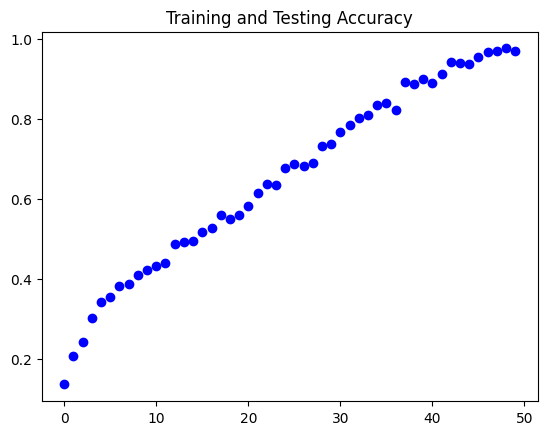

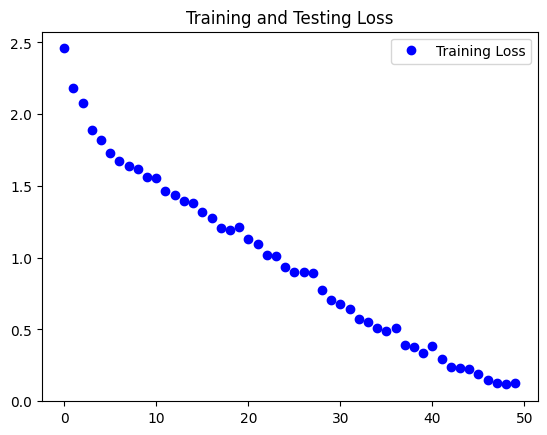

Found 999 images belonging to 10 classes.
Epoch 1/10


2024-01-28 21:35:42.364341: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_1/dropout_1/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


50/50 - 2s - loss: 2.3698 - acc: 0.1792 - 2s/epoch - 38ms/step
Epoch 2/10
50/50 - 0s - loss: 1.9468 - acc: 0.2933 - 319ms/epoch - 6ms/step
Epoch 3/10
50/50 - 0s - loss: 1.6463 - acc: 0.4254 - 311ms/epoch - 6ms/step
Epoch 4/10
50/50 - 0s - loss: 1.3067 - acc: 0.5536 - 315ms/epoch - 6ms/step
Epoch 5/10
50/50 - 0s - loss: 0.9710 - acc: 0.6947 - 308ms/epoch - 6ms/step
Epoch 6/10
50/50 - 0s - loss: 0.6940 - acc: 0.8038 - 314ms/epoch - 6ms/step
Epoch 7/10
50/50 - 0s - loss: 0.4589 - acc: 0.9079 - 318ms/epoch - 6ms/step
Epoch 8/10
50/50 - 0s - loss: 0.3165 - acc: 0.9399 - 326ms/epoch - 7ms/step
Epoch 9/10
50/50 - 0s - loss: 0.2050 - acc: 0.9790 - 317ms/epoch - 6ms/step
Epoch 10/10
50/50 - 0s - loss: 0.1307 - acc: 0.9940 - 310ms/epoch - 6ms/step


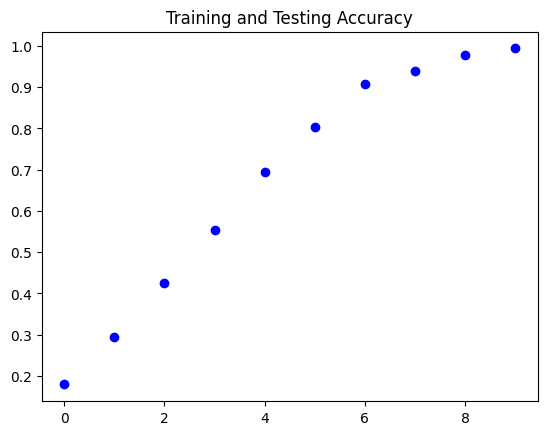

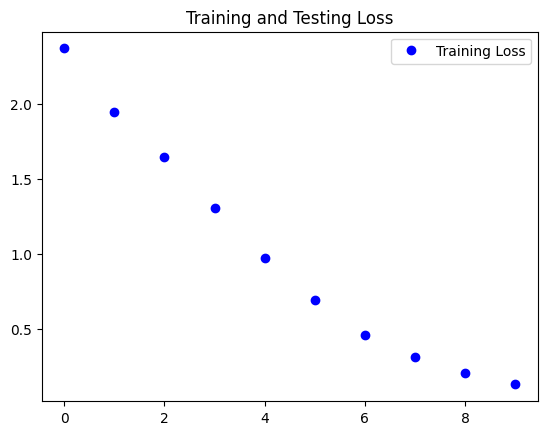

In [3]:
model_mfcc.train("./dataset/mfcc_format", epoch=230)
model_mel.train("./dataset/mel2_format", epoch=50)
model_chr.train("./dataset/chr_format", epoch=10)


In [4]:
model_mel.save_model("./model/model_mel.h5")
model_chr.save_model("./model/model_chr.h5")
model_mfcc.save_model("./model/model_mfcc.h5")

In [5]:
model_mel.load_model("./model/model_mel.h5")
model_chr.load_model("./model/model_chr.h5")
model_mfcc.load_model("./model/model_mfcc.h5")

In [7]:
python_path = "/home/lumiani/miniconda3/envs/cs182/bin/python"
script_path = os.path.join(os.getcwd(), "data-preprocess2.py")
os.system(f"{python_path} {script_path}")

2024-01-28 21:37:13.699565: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-28 21:37:13.718871: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 21:37:13.718898: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 21:37:13.719446: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 21:37:13.722781: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 1293, 128, 32)     320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 646, 64, 32)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 646, 64, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 323, 32, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 323, 32, 128)      73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 161, 16, 128)      0

  0%|          | 0/10 [00:00<?, ?it/s]2024-01-28 21:37:16.999463: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907


1/1 [==============================] - 0s 10ms/step


 10%|█         | 1/10 [00:08<01:15,  8.44s/it]

1/1 [==============================] - 0s 9ms/step


 20%|██        | 2/10 [00:16<01:06,  8.35s/it]

1/1 [==============================] - 0s 9ms/step


 30%|███       | 3/10 [00:24<00:56,  8.14s/it]

1/1 [==============================] - 0s 11ms/step


 40%|████      | 4/10 [00:32<00:48,  8.02s/it]

1/1 [==============================] - 0s 14ms/step


 50%|█████     | 5/10 [00:40<00:39,  7.95s/it]

1/1 [==============================] - 0s 11ms/step
'NoneType' object has no attribute 'shape' /home/lumiani/Projects/IML/CS182-FinalProject/dataset/mel2_format/jazz/jazz.00054.jpg
'NoneType' object has no attribute 'shape' /home/lumiani/Projects/IML/CS182-FinalProject/dataset/chr_format/jazz/jazz.00054.jpg
'NoneType' object has no attribute 'shape' /home/lumiani/Projects/IML/CS182-FinalProject/dataset/mfcc_format/jazz/jazz.00054.jpg
1/1 [==============================] - 0s 10ms/step


[ WARN:0@46.205] global loadsave.cpp:248 findDecoder imread_('/home/lumiani/Projects/IML/CS182-FinalProject/dataset/mel2_format/jazz/jazz.00054.jpg'): can't open/read file: check file path/integrity
[ WARN:0@46.205] global loadsave.cpp:248 findDecoder imread_('/home/lumiani/Projects/IML/CS182-FinalProject/dataset/chr_format/jazz/jazz.00054.jpg'): can't open/read file: check file path/integrity
[ WARN:0@46.205] global loadsave.cpp:248 findDecoder imread_('/home/lumiani/Projects/IML/CS182-FinalProject/dataset/mfcc_format/jazz/jazz.00054.jpg'): can't open/read file: check file path/integrity


1/1 [==============================] - 0s 9ms/step


 60%|██████    | 6/10 [00:48<00:32,  8.01s/it]

1/1 [==============================] - 0s 9ms/step


 70%|███████   | 7/10 [00:56<00:23,  7.98s/it]

1/1 [==============================] - 0s 10ms/step


 80%|████████  | 8/10 [01:04<00:15,  7.95s/it]

1/1 [==============================] - 0s 10ms/step


 90%|█████████ | 9/10 [01:12<00:08,  8.04s/it]

1/1 [==============================] - 0s 10ms/step


100%|██████████| 10/10 [01:20<00:00,  8.06s/it]


0

2024-01-28 21:48:23.731858: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-28 21:48:23.752062: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-28 21:48:23.752080: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-28 21:48:23.752618: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-28 21:48:23.756356: I tensorflow/core/platform/cpu_feature_guar

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 30, 32)            128       
                                                                 
 conv1d_1 (Conv1D)           (None, 30, 64)            6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 30, 128)           24704     
                                                                 
 conv1d_3 (Conv1D)           (None, 30, 256)           98560     
                                                                 
 conv1d_4 (Conv1D)           (None, 30, 512)           393728    
                                                                 
 conv1d_5 (Conv1D)           (None, 30, 1024)          1573888   
                                                                 
 conv1d_6 (Conv1D)           (None, 30, 2048)          6

2024-01-28 21:48:24.848052: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-28 21:48:24.871698: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-28 21:48:24.871802: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

50/50 [==============================] - 5s 36ms/step - loss: 2.2033 - acc: 0.2050
Epoch 2/350
50/50 [==============================] - 2s 35ms/step - loss: 2.0643 - acc: 0.2180
Epoch 3/350
50/50 [==============================] - 2s 35ms/step - loss: 2.0577 - acc: 0.2350
Epoch 4/350
50/50 [==============================] - 2s 36ms/step - loss: 2.0132 - acc: 0.2470
Epoch 5/350
50/50 [==============================] - 2s 36ms/step - loss: 1.9197 - acc: 0.2970
Epoch 6/350
50/50 [==============================] - 2s 36ms/step - loss: 1.9289 - acc: 0.3280
Epoch 7/350
50/50 [==============================] - 2s 35ms/step - loss: 1.9455 - acc: 0.2960
Epoch 8/350
50/50 [==============================] - 2s 35ms/step - loss: 1.8664 - acc: 0.3200
Epoch 9/350
50/50 [==============================] - 2s 36ms/step - loss: 1.8215 - acc: 0.3410
Epoch 10/350
50/50 [==============================] - 2s 36ms/step - loss: 1.8803 - acc: 0.3290
Epoch 11/350
50/50 [==============================] - 2s 35ms

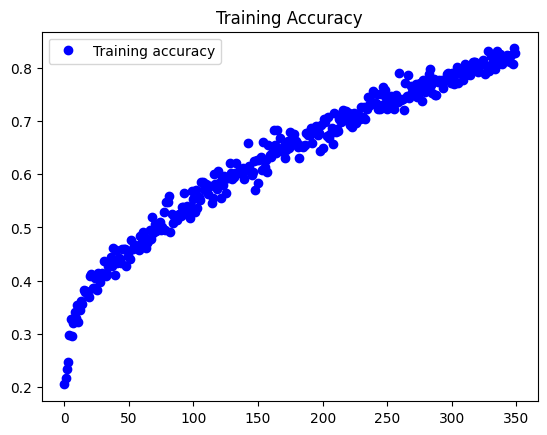

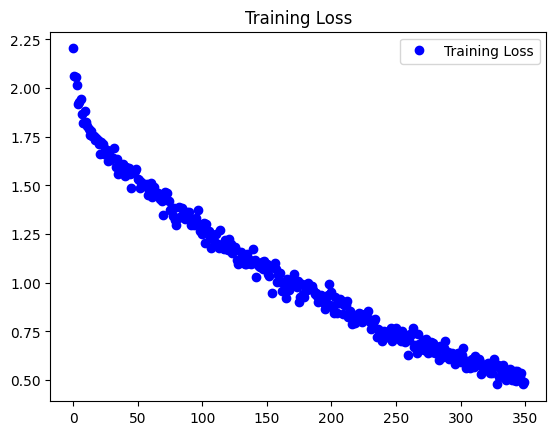

In [1]:
from NeuralNetwork.combine_model import CombineModel
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
combine_model = CombineModel(input_dim=30)
combine_model.train("/home/lumiani/Projects/IML/CS182-FinalProject/dataset/merge_format", epoch=350)

In [9]:
import numpy as np
import librosa

# y, sr = librosa.load("./dataset/test_long/On Va S'aimer Encore.mp3")
y,  sr = librosa.load("./dataset/test_long/DSM-V.mp3")
# y, sr = librosa.load("./dataset/test_long/许巍 - 蓝莲花.mp3")
# y, sr = librosa.load("./dataset/test_long/Charlie Puth - See You Again.mp3")
# y, sr = librosa.load("./dataset/audio_format/pop/pop.00011.wav")
# y, sr = librosa.load("./dataset/test_long/killing in the name.mp3")
# y, sr = librosa.load("./dataset/test_long/deemo-good-bye.mp3")
# y, sr = librosa.load("dataset/test_long/拉德斯基进..._lan.flac")
# y, sr = librosa.load("dataset/test_long/悲怆 第三章.flac")
# y, sr = librosa.load("dataset/test_long/Bad Apple-のみこ,Masayoshi Minoshima.flac")
# y, sr = librosa.load("dataset/test_long/pf.mp3")
# y, sr = librosa.load("dataset/test_long/pfffff.mp3")
# y, sr = librosa.load("")


spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

mel_pic = librosa.power_to_db(spectrogram, ref=np.max)

harmonic = librosa.effects.harmonic(y)  ##
harmonic_features = librosa.feature.chroma_cqt(y=harmonic, sr=sr)  ##

mfccs = librosa.feature.mfcc(y=y, sr=sr)

duration = len(y) / sr



# Assuming model1, model2, model3 are already defined with different input shapes but the same output shape

_, pre_mel = model_mel.predict(mel_pic, duration)
_, pre_chr = model_chr.predict(harmonic_features, duration)
_, pre_mfcc = model_mfcc.predict(mfccs, duration)


pre_mel=pre_mel.flatten()
pre_chr=pre_chr.flatten()
pre_mfcc=pre_mfcc.flatten()

#xpj add:
merge_array=[]
for arr in [pre_mel, pre_chr, pre_mfcc]:
    merge_array.extend(arr)
merge_array=np.expand_dims(merge_array, axis=0)
# for i in range (10):
#     merge_array.append(pre_mel[i])
#     merge_array.append(pre_chr[i])
#     merge_array.append(pre_mfcc[i])
# merge_array=np.asarray(merge_array)
# print(merge_array.shape)
import keras
combine_model.model = keras.models.load_model("./model/save/combine.h5")
pre = combine_model.model.predict(merge_array)
print(pre)
class_idx = np.argmax(pre, axis=1)[0]
print(["pop", "classical", "pop", "rock", "pop", "jazz", "rock", "pop", "pop", "rock"][class_idx])


1/1 [==============================] - 0s 65ms/step
[[4.9721429e-20 3.7227048e-17 6.5182963e-15 9.9566287e-01 4.3371650e-03
  0.0000000e+00 6.7908698e-15 0.0000000e+00 2.0563019e-34 3.0295671e-15]]
rock


In [8]:
import librosa

# 加载音频文件
audio_file = './dataset/audio_format/blues/blues.00000.wav'  # 替换为您的音频文件路径
y, sr = librosa.load(audio_file)

# 1. 音高和旋律特征
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

# 2. 节奏和节拍
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

# 3. 和声和和弦结构
harmonic = librosa.effects.harmonic(y)
harmonic_features = librosa.feature.chroma_cqt(y=harmonic, sr=sr)

# 4. 音色和乐器使用
mfccs = librosa.feature.mfcc(y=y, sr=sr)

# 5. 动态范围和强度
S, phase = librosa.magphase(librosa.stft(y))
rms = librosa.feature.rms(S=S)

# 6. 时间结构和形式
temporal_onset = librosa.onset.onset_strength(y=y, sr=sr)

# 7. 时域特征
zero_crossing_rate = librosa.feature.zero_crossing_rate(y)

# 输出每个特征的shape
print("Chroma (Pitch):", chroma.shape)
print("Tempo (Rhythm):", beat_times.shape)
print("Harmonic Features (Harmony):", harmonic_features.shape)
print("MFCCs (Timbre):", mfccs.shape)
print("RMS (Dynamics):", rms.shape)
print("Temporal Onset (Form):", temporal_onset.shape)
print("Zero Crossing Rate (Time-domain):", zero_crossing_rate.shape)

Chroma (Pitch): (12, 1293)
Tempo (Rhythm): (61,)
Harmonic Features (Harmony): (12, 1293)
MFCCs (Timbre): (20, 1293)
RMS (Dynamics): (1, 1293)
Temporal Onset (Form): (1293,)
Zero Crossing Rate (Time-domain): (1, 1293)
